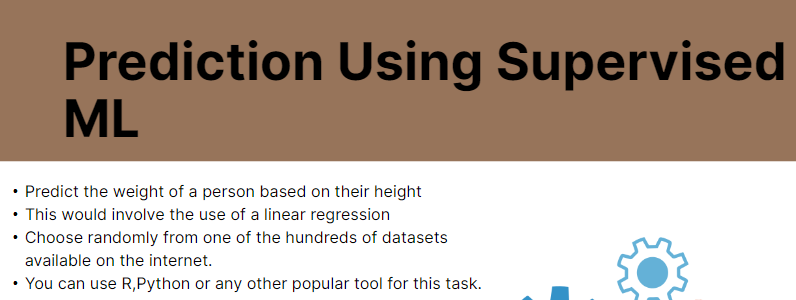

**Regression**

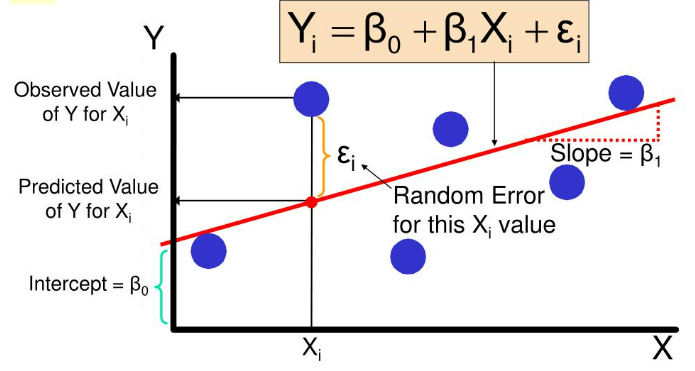


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('weight_height_dataset.csv')

In [4]:
data.head(15)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
data['Gender'].replace('Female',0,inplace = True)
data['Gender'].replace('Male',1,inplace = True)

In [7]:
data.head(15)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
5,1,67.253016,152.212156
6,1,68.785081,183.927889
7,1,68.348516,167.971110
8,1,67.018950,175.929440
9,1,63.456494,156.399676


In [8]:
data.tail(15)

,Gender,Height,Weight
9985,0,68.041065,170.514213
9986,0,63.352698,141.906510
9987,0,65.610243,151.169475
9988,0,59.538729,121.244876
9989,0,60.955084,95.686674
9990,0,63.179498,141.266100
9991,0,62.636675,102.853563
9992,0,62.077832,138.691680
9993,0,60.030434,97.687432
9994,0,59.098250,110.529686


In [9]:
x = data.iloc[:, [1]] #'Height' as independent variable
y = data.iloc[:, 2] #Dependent variable (Weight)

In [11]:
print(x)
print(y)

         Height
0     73.847017
1     68.781904
2     74.110105
3     71.730978
4     69.881796
...         ...
9995  66.172652
9996  67.067155
9997  63.867992
9998  69.034243
9999  61.944246

[10000 rows x 1 columns]
0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64


In [12]:
data.shape

(10000, 3)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()

In [15]:
LinR.fit(x_train,y_train)

LinearRegression()

In [18]:
PW = LinR.predict(x_test)
score = LinR.score(x,y)*100
print(score)
from sklearn import metrics
root_mean_square = np.sqrt(metrics.mean_squared_error(y_test,PW))
print(root_mean_square)

85.51728878507801
12.105237384684958


In [19]:
from sklearn.metrics import mean_squared_error

RMSE_test = (np.sqrt(mean_squared_error(y_test,PW)))

print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print("RSquared value on test: ",LinR.score(x_test,y_test))

RMSE TestData =  12.105237384684958
--------------------------------------------------
RSquared value on test:  0.8581952493935256


In [20]:
LinR.predict([[66.5]])

array([162.48225708])

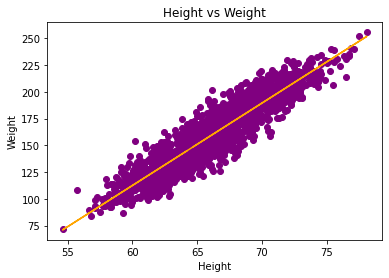

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 
#displaying the values of height in the test feature matrix (x_test) and the real weight values with a scatter plot
plt.scatter(x_test, y_test, color = 'purple')

#displaying the regression line of predicted weight values generated by our model.
plt.plot(x_test, PW, color = 'orange')

plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()